# Boxplot

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [2]:
tips = sns.load_dataset('tips')
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


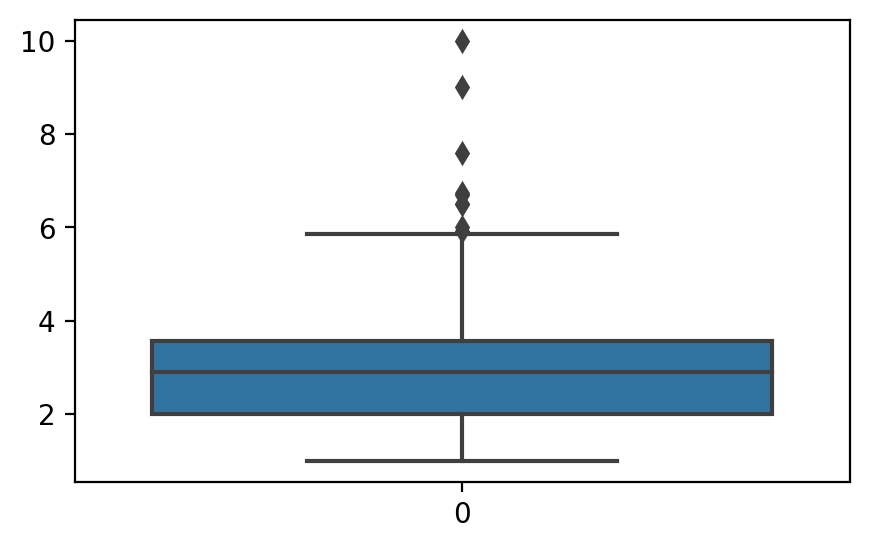

In [3]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.boxplot(tips['tip'])
plt.show();

## 박스플롯(Boxplot)
- 25% 제1사분위수(Q1)
- 75% 제3사분위수(Q3)
- 50% 중앙값(Q2)
- IQR (50%)
- 최댓값, 최솟값
- upper_fence, lower_fence
- 아웃라이어(Outlier), 이상치

### 분위수 값 구하기
1. 데이터를 오름차순 정렬
2. 오름차순 정렬한 데이터의 크기(길이, 갯수, 몇개)를 구한다
3. 25%, 75% 값을 곱합니다
4. 정수로 반환
5. 인덱스 값
    - 내 오름차순 정렬한 데이터 저 인덱스값을 넣으면, 
    - 그게 제1, 3사분위수 값입니다

In [12]:
datas = np.random.choice(range(3, 51), size=10, replace=False)  # True 중복허용 False 중복제거

In [15]:
my_data = pd.Series(datas)

In [31]:
# 오름차순 정렬
sorted_datas = my_data.sort_values()
sorted_datas.reset_index(drop=True, inplace=True)

In [35]:
# 데이터의 길이를 구합니다 
# 25%, 75% 곱합니다 
# 정수로 반환 
# 인덱스 값 

q1 = sorted_datas[int(len(sorted_datas) * 0.25)]
q3 = sorted_datas[int(len(sorted_datas) * 0.75)]
q1, q3

(14, 29)

In [34]:
sorted_datas.describe()

count    10.000000
mean     22.300000
std       8.807194
min       8.000000
25%      15.250000
50%      23.000000
75%      28.500000
max      34.000000
dtype: float64

In [26]:
my_data.describe()

count    10.000000
mean     22.300000
std       8.807194
min       8.000000
25%      15.250000
50%      23.000000
75%      28.500000
max      34.000000
dtype: float64

## 중앙값 구하기 
1. 데이터를 오름차순 정렬합니다 
2. 정렬된 데이터의 크기(길이, 갯수, 몇개)를 구합니다
3. 크기가 홀수인 경우에는 중간 위치에 있는 값을 중앙값으로 선택합니다
4. 크기가 짝수인 경우에는 중간 위치에 있는 두 값의 평균을 중앙값으로 선택합니다

In [36]:
n = len(sorted_datas)

if n % 2 == 1:
    median = sorted_datas[n // 2]
else:
    median = (sorted_datas[n // 2 - 1] + sorted_datas[n // 2]) / 2

median

23.0

In [37]:
my_data.describe()

count    10.000000
mean     22.300000
std       8.807194
min       8.000000
25%      15.250000
50%      23.000000
75%      28.500000
max      34.000000
dtype: float64

In [38]:
# iqr 
iqr = q3 - q1
iqr

15

In [39]:
upper_fence = q3 + (1.5 * iqr)
lower_fence = q1 - (1.5 * iqr)
upper_fence, lower_fence

(51.5, -8.5)

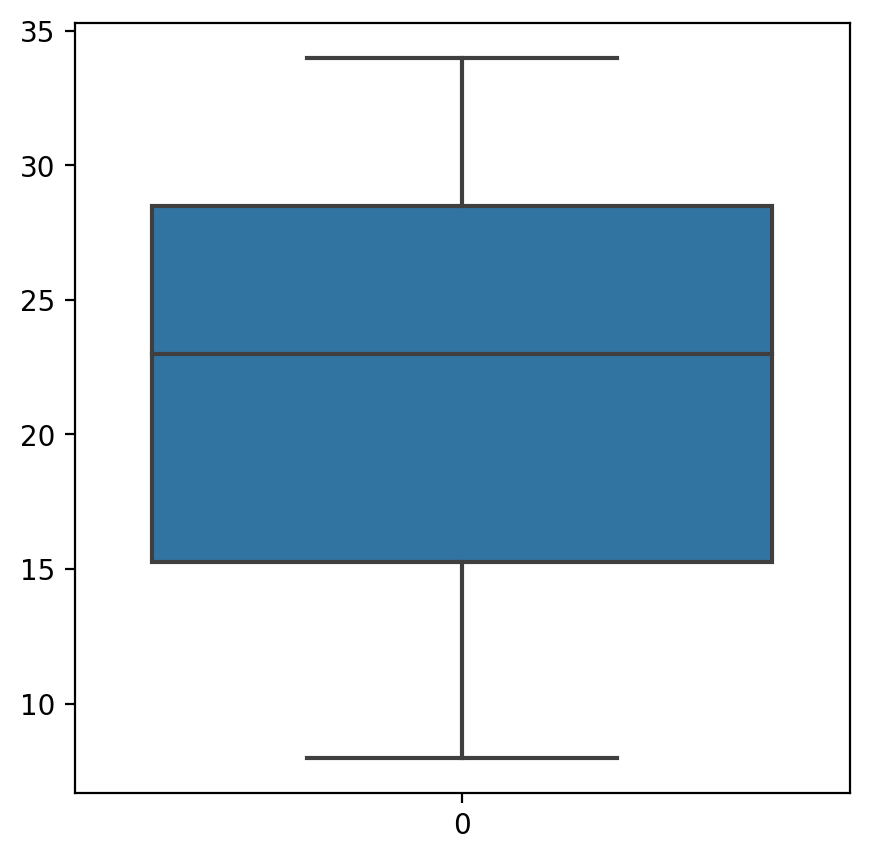

In [40]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(my_data)
plt.show();